In [1]:
import cv2
ori=cv2.imread('xaun.png',cv2.IMREAD_REDUCED_COLOR_2)
cv2.imshow('Origin',ori)
cv2.waitKey()

-1

In [2]:
gray = cv2.cvtColor(ori,cv2.COLOR_RGB2GRAY)
cv2.imshow('Gray',gray)
cv2.waitKey()

-1

cv2.calcHist()函数  

        通过直方图可以很好的对整幅图像的灰度分布有一个整体的了解，直方图的x轴是灰度值（0~255），y轴是图片中具有同一个灰度值的点的数目。 
        而calcHist（）函数则可以帮助我们统计一幅图像的直方图

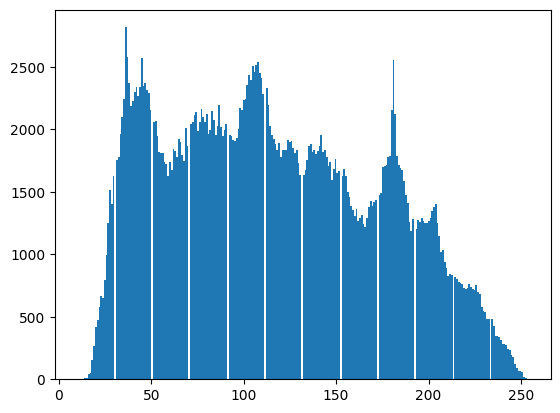

In [3]:
import matplotlib.pyplot as plt
cv2.calcHist([gray],[0],None,[256],[0,256])
plt.hist(gray.ravel(),256);
plt.show()

0 b
1 g
2 r


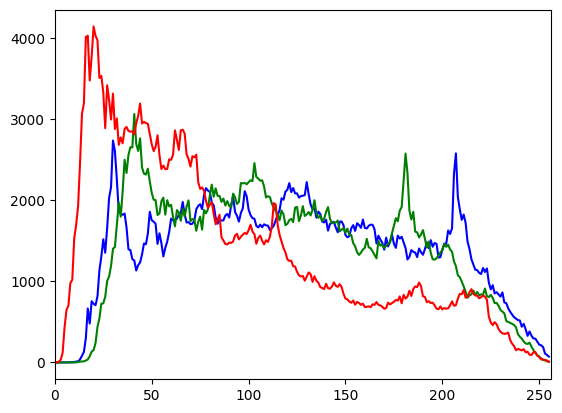

In [4]:
import matplotlib.pyplot as plt
color = ('b','g','r')
for i,col in enumerate(color): 
    histr = cv2.calcHist([ori],[i],None,[256],[0,256]) 
    plt.plot(histr,color = col) 
    plt.xlim([0,256]) 
    print(i,col)

cv2.equalizeHist(img)

        参数：img表示输入的图片

        作用：表示进行直方图均衡化

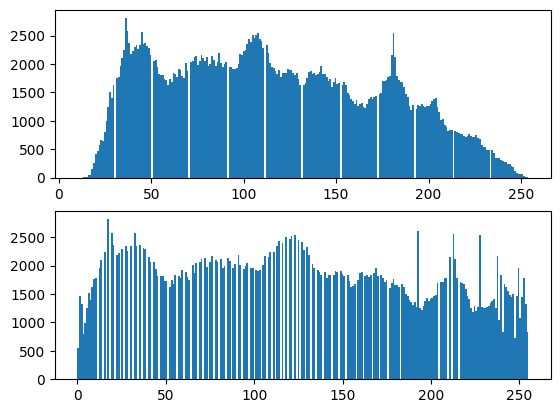

-1

In [5]:
import numpy as np
ret = cv2.equalizeHist(gray)
plt.subplot(211)
plt.hist(gray.ravel(), 256)
plt.subplot(212)
plt.hist(ret.ravel(), 256)
plt.show()
cv2.imshow('ret', np.hstack((gray, ret)))
cv2.waitKey(0)

cv2.createCLAHA(clipLimit, titleGridSize) 

        参数：clipLimit颜色对比度的阈值

                   titleGridSize进行像素均衡化的网格大小，即在多少网格下进行直方图的均衡化操作

        作用： 用于生成自适应均衡化图像

In [6]:
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8, 8))
clahe = clahe.apply(gray)
cv2.imshow('imgs', np.hstack((gray, ret, clahe)))
cv2.waitKey(0)

-1

-1

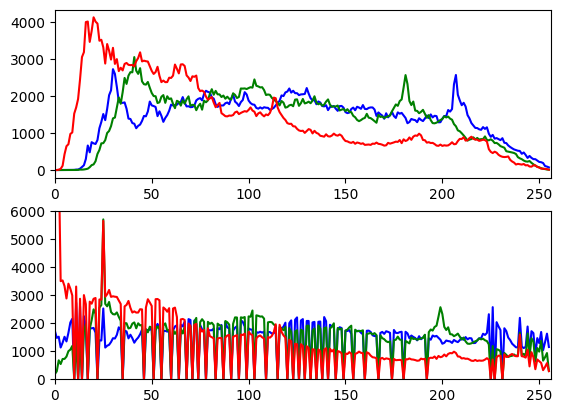

In [21]:
import matplotlib.pyplot as plt
import numpy as np
def Hist_transform(src,mode=0):
    reflection = []
    tgt = np.copy(src)
    if mode == 1:
        color = ('b','g','r')
        for i,col in enumerate(color):
            histr = cv2.calcHist([src],[i],None,[256],[0,256])  
            plt.subplot(211)
            plt.plot(histr,color = col) 
            plt.xlim([0,256])     
            for j in range(0,256):
                reflection.append(int(np.sum(histr[:j])/np.sum(histr)*256))
            for a in range(0,src.shape[0]):
                for b in range(0,src.shape[1]):
                    tgt[a][b][i]=reflection[src[a][b][i]]
            hist2 = cv2.calcHist([tgt],[i],None,[256],[0,256]) 
            plt.subplot(212)
            plt.plot(hist2,color = col) 
            plt.xlim([0,256])
            plt.ylim([0,6000])
    else:
        histr = cv2.calcHist([src],[0],None,[256],[0,256])  
        plt.subplot(211)
        plt.hist(gray.ravel(), 256)
        for j in range(0,256):
                reflection.append(int(np.sum(histr[:j])/np.sum(histr)*256))
        for a in range(0,src.shape[0]):
            for b in range(0,src.shape[1]):
                tgt[a][b]=reflection[src[a][b]]
        plt.subplot(212)
        plt.hist(tgt.ravel(), 256)
        plt.show()
    return tgt

tgt=Hist_transform(ori,1)
cv2.imshow('result', np.hstack((ori, tgt)))
cv2.waitKey()